<b>Astronomy Dataset:</b> <href>https://www.kaggle.com/datasets/melcore/astronomy-picture-of-the-day</href>

<b>Similarity Image Dataset:</b>
<href>https://www.kaggle.com/datasets/tanyadayanand/geological-image-similarity</href>

<b>Noisy Image Dataset:</b>
<href>
https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
</href>


<b>Cat and dog Dataset:</b>
<href>https://www.kaggle.com/datasets/whenamancodes/cat-and-dog-finder</href>




# Kaggle dataset to colab

In [1]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [3]:
! mkdir ~/.kaggle

If you want to copy the kaggle API credentials to the temporary location... (I recommend placing it on your Google Drive)

In [4]:
#! cp kaggle.json ~/.kaggle/

Upload the json file to Google Drive and then copy to the temporary location.

In [5]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


Change the file permissions to read/write to the owner only

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Competitions and Datasets are the two types of Kaggle data**

In [7]:
! mkdir /content/kaggle_data

In [8]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


**1. Download competition data**

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [9]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
 99% 2.39G/2.40G [00:26<00:00, 139MB/s]
100% 2.40G/2.40G [00:26<00:00, 95.6MB/s]


In [10]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

#image_io

In [11]:
from skimage import io

In [12]:
image_1 = io.imread("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png")

In [13]:
image_1

array([[[ 67,  66,  43],
        [ 61,  60,  38],
        [ 54,  53,  31],
        ...,
        [134, 151, 184],
        [131, 149, 182],
        [133, 150, 183]],

       [[ 64,  64,  41],
        [ 62,  61,  39],
        [ 54,  53,  31],
        ...,
        [134, 151, 184],
        [133, 150, 183],
        [134, 151, 184]],

       [[ 59,  61,  38],
        [ 58,  60,  36],
        [ 62,  61,  39],
        ...,
        [134, 151, 184],
        [133, 150, 183],
        [134, 151, 184]],

       ...,

       [[ 17,  17,  15],
        [ 15,  15,  13],
        [ 12,  13,  10],
        ...,
        [ 10,  12,   9],
        [ 10,  12,   9],
        [  8,  11,   8]],

       [[ 17,  17,  15],
        [ 15,  15,  13],
        [ 15,  15,  13],
        ...,
        [  7,  10,   7],
        [  8,  11,   8],
        [  6,   9,   6]],

       [[ 17,  17,  15],
        [ 15,  15,  13],
        [ 15,  15,  13],
        ...,
        [  7,  10,   7],
        [  7,  10,   7],
        [  6,   9,   6]]

In [14]:
import numpy as np
print(np.shape(image_1))

(1536, 2592, 3)


# **Task :**
## **Apply addition, subtraction, and multiplication** to apply image processing on an input image to achieve:


*   ***Noise Reduction***
*   ***Change detection***
*   ***Masking***





# Folder with noisy data

In [15]:
import os

In [16]:
from matplotlib import pyplot as plt
import numpy as np

In [17]:
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene10.png"):
            txt_files.append(os.path.join(root, file))


/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png


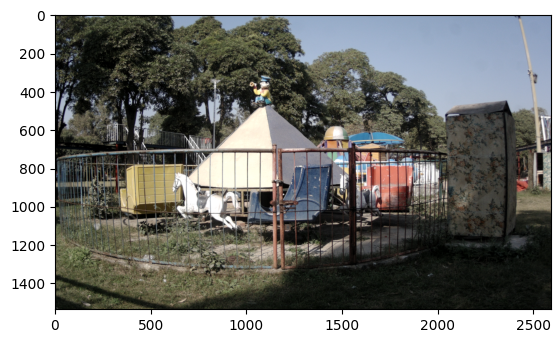

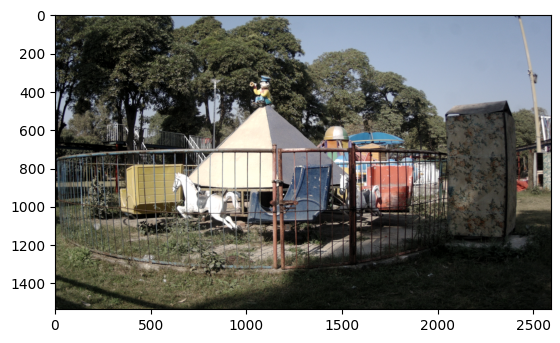

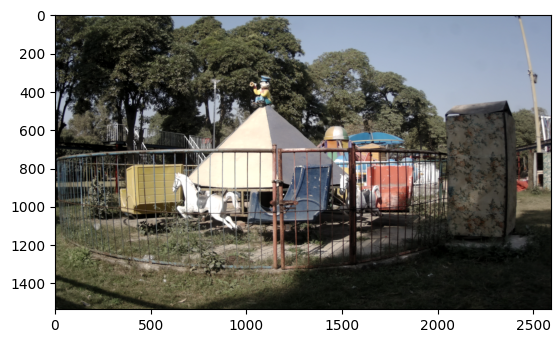

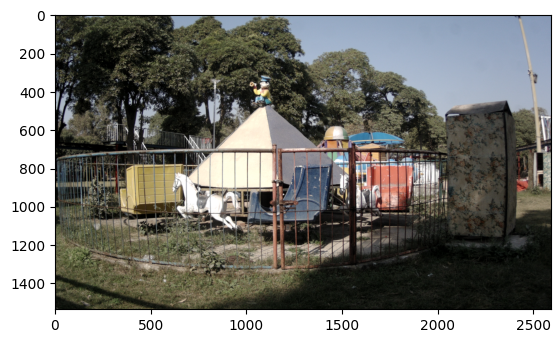

In [18]:
for noisy_image in txt_files:
  print(noisy_image)
  image = io.imread(noisy_image)
  plt.figure()
  plt.imshow(image)

plt.show()

In [19]:
image_1 = io.imread(txt_files[0])
image_2= io.imread(txt_files[1])
image_3= io.imread(txt_files[2])
image_4= io.imread(txt_files[3])

# Task 1 : Using image addition (averaging) for noise reduction.

**Addition : s(x,y)=f(x,y)+g(x,y)**

image source : https://www.khanacademy.org/
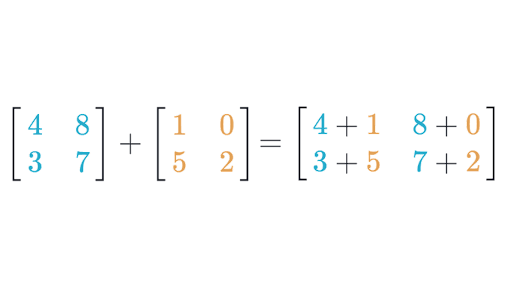

**Doing addition**

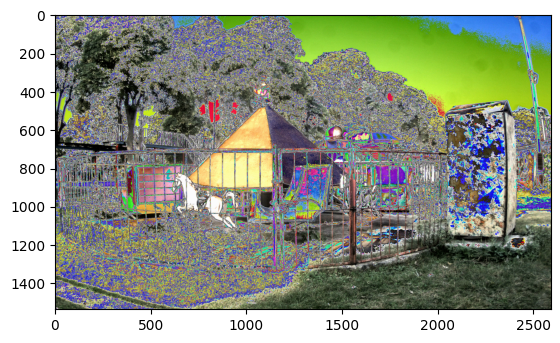

In [20]:
image_sum = image_1+image_2+image_3+image_4
plt.figure()
plt.imshow(image_sum)
plt.show()

Here,Addition operation change the pixel values from our desired image.
So we must use average operation for noise reduction.

**Noise reduction by average**

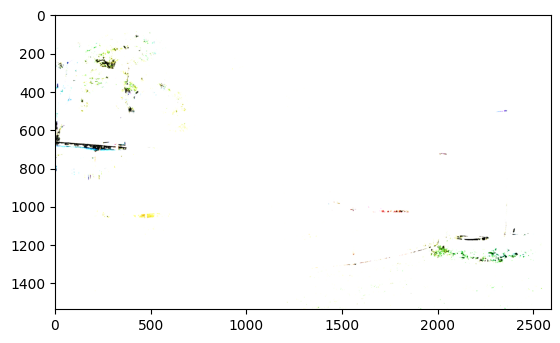

In [21]:
# numpy.mean() : Compute the arithmetic mean along the specified axis
#                Parameters(array_like,axis)

average_image = np.mean(np.array([image_1, image_2, image_3, image_4]), axis=0)
plt.figure()
plt.imshow(average_image)
plt.show()

Averaging created decimal pixel value.

In [22]:
average_image

array([[[ 66.  ,  65.  ,  47.  ],
        [ 62.  ,  61.25,  43.5 ],
        [ 56.75,  56.25,  39.5 ],
        ...,
        [136.5 , 154.  , 185.5 ],
        [135.25, 152.75, 184.5 ],
        [136.25, 153.75, 185.25]],

       [[ 62.75,  62.75,  44.5 ],
        [ 61.75,  61.25,  43.5 ],
        [ 58.  ,  57.5 ,  40.5 ],
        ...,
        [135.5 , 153.25, 184.5 ],
        [135.75, 153.  , 184.75],
        [136.75, 154.25, 185.75]],

       [[ 62.  ,  62.  ,  44.75],
        [ 59.75,  59.75,  41.75],
        [ 60.  ,  58.75,  42.25],
        ...,
        [135.75, 153.5 , 184.75],
        [135.75, 153.  , 184.75],
        [136.5 , 153.75, 185.5 ]],

       ...,

       [[ 14.  ,  15.5 ,  12.25],
        [ 13.  ,  14.5 ,  11.  ],
        [ 10.  ,  12.  ,   8.5 ],
        ...,
        [  9.25,  10.75,   8.  ],
        [  9.25,  10.75,   8.  ],
        [  8.25,   9.75,   7.25]],

       [[ 16.  ,  18.25,  14.75],
        [ 14.  ,  16.25,  13.  ],
        [ 13.  ,  15.25,  11.5 ],
        .

Here I handle this issue.

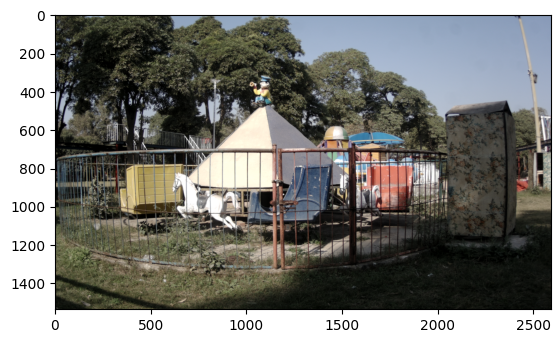

In [23]:
average_image = np.mean(np.array([image_1, image_2, image_3, image_4]), axis=0)

#np.uint8 refers to an unsigned integer data type in NumPy that can represent integer values from 0 to 255 (inclusive).
#numpy.clip() : Clip (limit) the values in an array. Parameters(array_like,axis)

average_image = np.uint8(np.clip(average_image, 0, 255))
plt.figure()
plt.imshow(average_image)
plt.show()

This is noise reduced image usning average operation


# Task 2 : change detection by subtraction

**Addition : d(x,y)=f(x,y)-g(x,y)**

image source : https://testbook.com
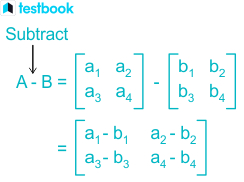

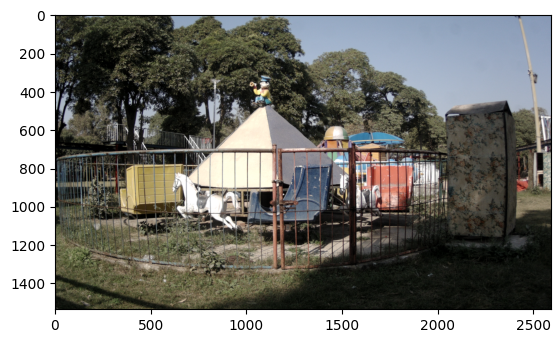

In [24]:
plt.figure()
plt.imshow(image_4)
plt.show()

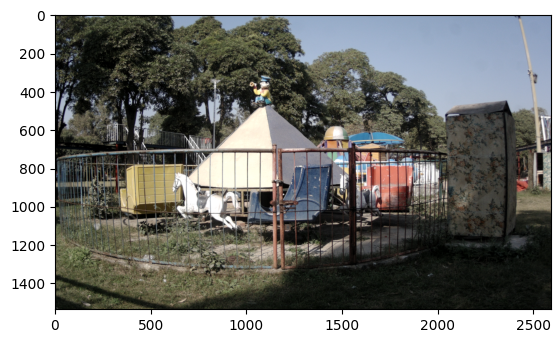

In [25]:
plt.figure()
plt.imshow(image_1)
plt.show()

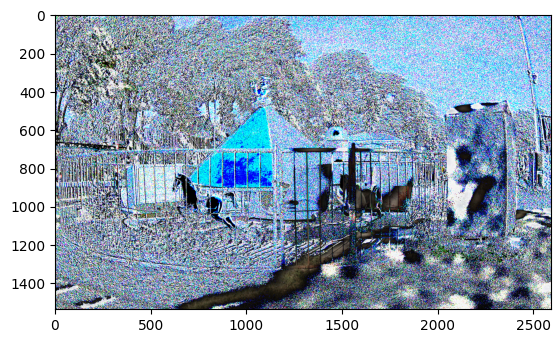

In [26]:
image_sub = image_4 - image_1
plt.figure()
plt.imshow(image_sub)
plt.show()

change detection using Open CV absolute difference function


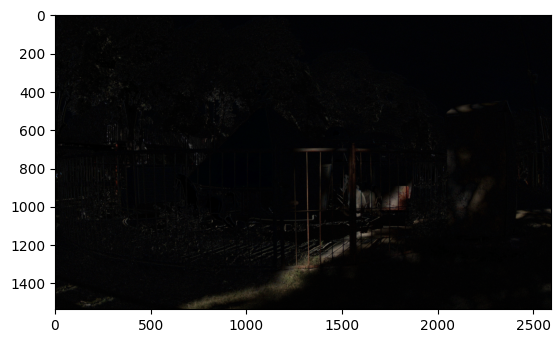

In [27]:
import cv2
#for Computing the absolute difference I use cv.absdiff() function
#This function calculates the per-element absolute difference between two arrays or between an array and a scalar.
change_detected_image = cv2.absdiff(image_4,image_1)
plt.figure()
plt.imshow(change_detected_image)
plt.show()

# Task 3 : Masking by multiplication


**For masking we should do elementwise multiplication.**

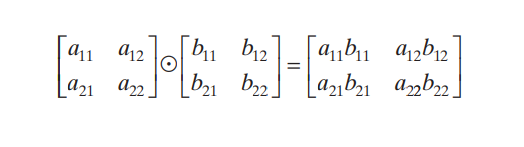

image source : Digital Image Processing by Rafael C. Gonzalez,Richard E. Woods

 Multiplication : f(x,y)=g(x,y)*h(x,y)

**Here I will mask the horse from this image**

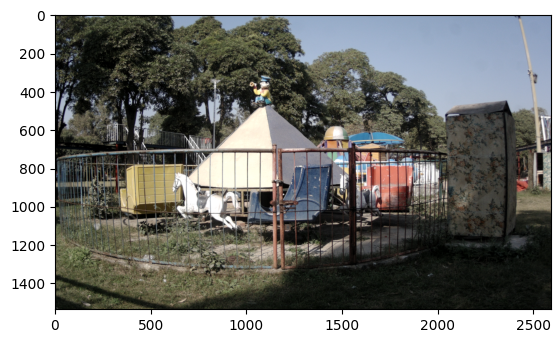

In [28]:
plt.figure()
plt.imshow(image_1)
plt.show()

generating mask image

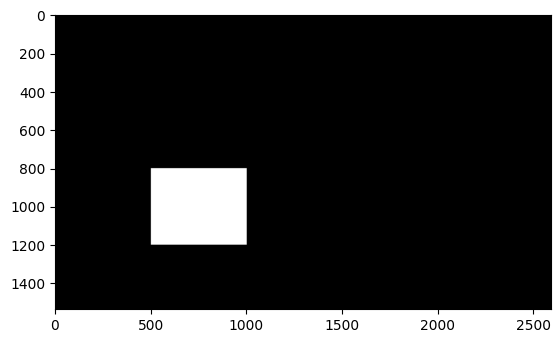

In [29]:
# Create a new image with the same dimensions as image_1
new_image = np.zeros_like(image_1)
#set desired pixel value to 255
new_image[800:1200, 500:1000]=255
# Display the new image
plt.figure()
plt.imshow(new_image)
plt.show()

Before multiplication I set the desired pixel values to 1 and other values to 0.Because while it perform elementwise multiplication it keep the pixel value of masking area same and rest of the pixel values will become zero.

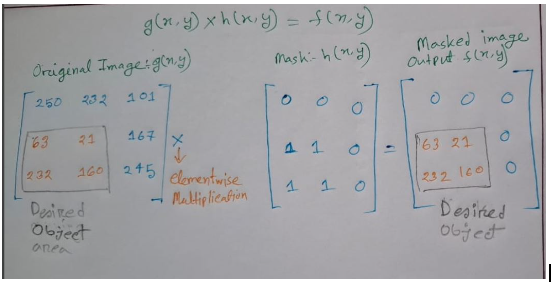

In [30]:
#set desired pixel value to 255
new_image[new_image == 255] =1

Multiplying by mask

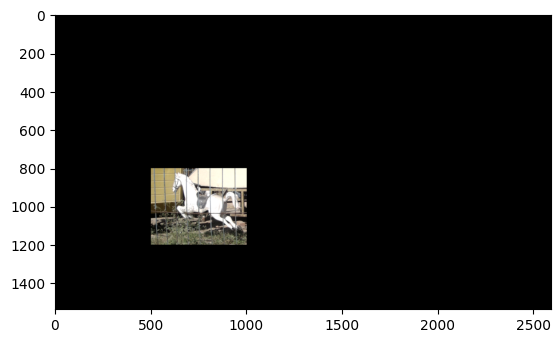

In [31]:
final_image = image_1*new_image
plt.figure()
plt.imshow(final_image)
plt.show()

**Thank you**